In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.txt
/kaggle/input/all-crypto-currencies/crypto-markets.csv


<h1> Run Case Study (Crypto Currency)  </h1>

<h2> 1. Data Profilling </h2>

In [2]:
import pandas as pd
df = pd.read_csv('../input/all-crypto-currencies/crypto-markets.csv', delimiter=',', header=0)
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [3]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [4]:
df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


<h2> 2. Data Reduction </h2>

In [6]:
check = df.duplicated(keep='first')

In [7]:
sum(check)

0

<h2> 3. Data Transformation </h2>

In [8]:
df_clean = df
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['market_billion'] = df_clean['market'] / 1000000000
df_clean['volume_million'] = df_clean['volume'] / 1000000000
df_clean['volume_billion'] = df_clean['volume']

In [9]:
df_clean.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05,942297.000000,9.422970e+05,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02,0.172506,8.720383e-03,8.720383e+06
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03,3.575590,1.839802e-01,1.839802e+08
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00,0.000030,1.750000e-07,1.750000e+02
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00,0.000523,4.278000e-06,4.278000e+03
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02,0.006875,1.190900e-04,1.190900e+05
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06,326.502486,2.384090e+01,2.384090e+10


<h2> 4. Data Enrichment </h2>

In [10]:
df_clean.groupby(['date','name'])['close'].mean().unstack()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,0.094182,0.347974,0.321285,0.001996,0.085203,0.001617,175.98,23575.30,0.023521,2.400000e-07,...,0.047550,0.003004,0.000010,0.967816,0.000365,0.062159,0.002505,0.002036,0.001411,0.004873
2018-11-27,0.094085,0.357042,0.366923,0.001905,0.075873,0.001563,133.68,25086.00,0.020391,2.500000e-07,...,0.049915,0.003150,0.000010,0.994856,0.000371,0.070546,0.002612,0.002028,0.001408,0.004697
2018-11-28,0.106128,0.435269,0.418035,0.002013,0.084989,0.001903,148.18,25512.10,0.019501,2.300000e-07,...,0.051809,0.003925,0.000014,0.996896,0.000424,0.078514,0.002917,0.002466,0.001391,0.005635


In [11]:
close_price = df_clean.groupby(['date','name'])['close'].mean().unstack()

<h2> EDA </h2>

In [12]:
top10 = df.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values()
top10

name
Cardano          1.085456
Bitcoin SV       1.714035
Tether           1.851553
Litecoin         2.006242
EOS              2.738537
Stellar          3.162026
Bitcoin Cash     3.164359
Ethereum        12.166286
XRP             15.306739
Bitcoin         74.451017
Name: market_billion, dtype: float64

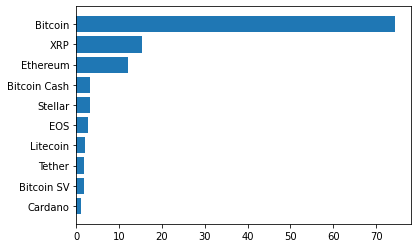

In [13]:
import matplotlib.pyplot as plt
plt.barh(top10.index, top10)
plt.show()

<AxesSubplot:ylabel='name'>

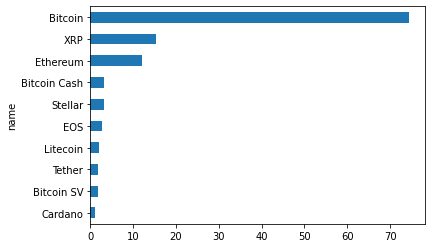

In [14]:
top10.plot(kind='barh')

In [15]:
top10 = df.groupby(['name'])['volume_billion'].max().sort_values(ascending=False).head(10).sort_values()
top10

name
IOTA            2.126970e+09
Qtum            2.427870e+09
TRON            4.089410e+09
EOS             4.870720e+09
Tether          6.247250e+09
Litecoin        6.961680e+09
XRP             9.110440e+09
Ethereum        9.214950e+09
Bitcoin Cash    1.188960e+10
Bitcoin         2.384090e+10
Name: volume_billion, dtype: float64

In [16]:
top5 = df.groupby(['name'])['volume_billion'].min().sort_values(ascending=False).head(5).sort_values()
top5

name
Mithril      4290760.0
VeChain      4508570.0
EOS          4556540.0
Ontology    10120300.0
CK USD      36345600.0
Name: volume_billion, dtype: float64

<AxesSubplot:ylabel='volume_billion'>

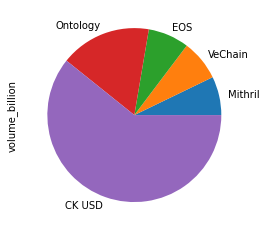

In [17]:
top5.plot(kind='pie')

เป็นการแสดงข้อมูลเหรียญที่มีมูลค่าน้อยที่สุดในตลาด 5 อันดับ แต่เป็นการแสดงผลในรูปแบบของ pie chart ซึ่งจาก chart นี้ก็จะเห็นได้ว่า Mithril มีสัดส่วนที่น้อยที่สุดหมายความว่า Mithril มีมูลค่าน้อยที่สุดในตลาดนั่นเอง

<AxesSubplot:ylabel='name'>

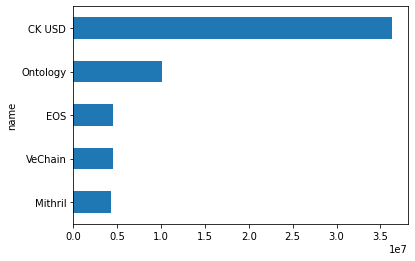

In [18]:
top5.plot(kind='barh')

<AxesSubplot:ylabel='volume_billion'>

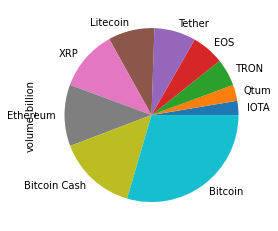

In [19]:
top10.plot(kind='pie')

In [20]:
top5 = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
top5

Index(['Bitcoin', 'XRP', 'Ethereum', 'Bitcoin Cash', 'Stellar'], dtype='object', name='name')

In [21]:
 best3 = pd.concat( [df[df['name'] == 'Bitcoin'], df[df['name'] == 'XRP'], df[df['name'] == 'Ethereum']] )

In [22]:
best3

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88,1.488567,0.000000,0.000000e+00
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49,1.603769,0.000000,0.000000e+00
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88,1.542813,0.000000,0.000000e+00
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17,1.298955,0.000000,0.000000e+00
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32,1.168517,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,ethereum,ETH,Ethereum,2018-11-25,3,113.13,118.88,101.77,116.45,2.466750e+09,1.204390e+10,0.8580,17.11,12.043901,2.466750,2.466750e+09
5193,ethereum,ETH,Ethereum,2018-11-26,3,116.34,118.20,104.89,108.33,2.139490e+09,1.120678e+10,0.2585,13.31,11.206775,2.139490,2.139490e+09
5194,ethereum,ETH,Ethereum,2018-11-27,3,107.91,111.84,102.45,110.01,2.320010e+09,1.138222e+10,0.8051,9.39,11.382217,2.320010,2.320010e+09
5195,ethereum,ETH,Ethereum,2018-11-28,3,110.20,126.05,110.20,122.44,2.673470e+09,1.267049e+10,0.7722,15.85,12.670491,2.673470,2.673470e+09


In [23]:
best3.groupby(['date','name'])['close'].mean().unstack()

name,Bitcoin,Ethereum,XRP
date,,,
2013-04-28,134.21,NaN,NaN
2013-04-29,144.54,NaN,NaN
2013-04-30,139.00,NaN,NaN
2013-05-01,116.99,NaN,NaN
2013-05-02,105.21,NaN,NaN
...,...,...,...
2018-11-25,4009.97,116.45,0.374551
2018-11-26,3779.13,108.33,0.355451
2018-11-27,3820.72,110.01,0.360163


<AxesSubplot:xlabel='date'>

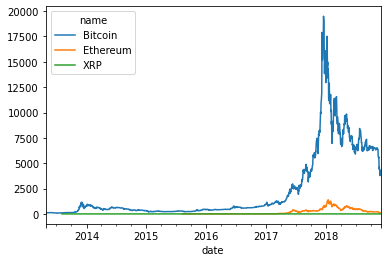

In [24]:
best3.groupby(['date','name'])['close'].mean().unstack().plot()

In [25]:
best3['date'].dt.year

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
5192    2018
5193    2018
5194    2018
5195    2018
5196    2018
Name: date, Length: 5197, dtype: int64

<AxesSubplot:xlabel='date'>

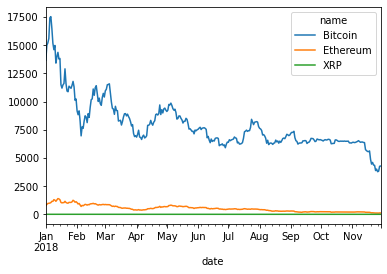

In [26]:
best3[best3['date'].dt.year == 2018].groupby(['date','name'])['close'].mean().unstack().plot()

<h2> Correlation </h2>

In [27]:
close_price

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,0.094182,0.347974,0.321285,0.001996,0.085203,0.001617,175.98,23575.30,0.023521,2.400000e-07,...,0.047550,0.003004,0.000010,0.967816,0.000365,0.062159,0.002505,0.002036,0.001411,0.004873
2018-11-27,0.094085,0.357042,0.366923,0.001905,0.075873,0.001563,133.68,25086.00,0.020391,2.500000e-07,...,0.049915,0.003150,0.000010,0.994856,0.000371,0.070546,0.002612,0.002028,0.001408,0.004697
2018-11-28,0.106128,0.435269,0.418035,0.002013,0.084989,0.001903,148.18,25512.10,0.019501,2.300000e-07,...,0.051809,0.003925,0.000014,0.996896,0.000424,0.078514,0.002917,0.002466,0.001391,0.005635


In [28]:
best3['name'].unique()

array(['Bitcoin', 'XRP', 'Ethereum'], dtype=object)

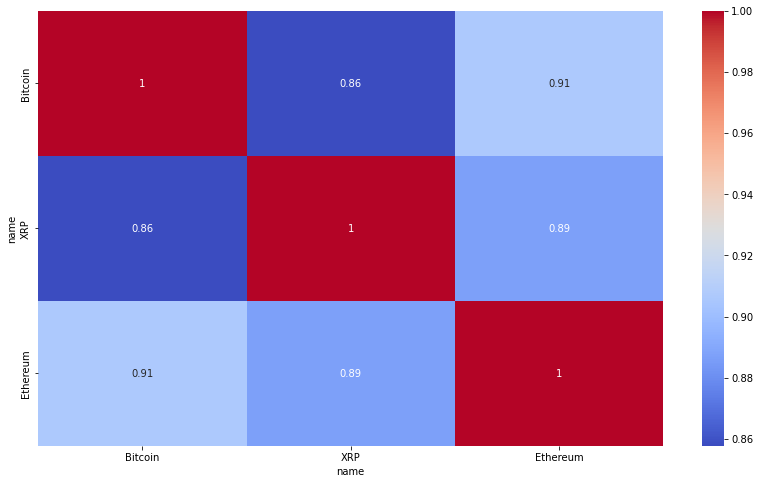

In [29]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(close_price[best3['name'].unique()].corr(), cmap='coolwarm', annot=True);

<h2> Anova </h2>

In [30]:
best3['name'].unique()[0]

'Bitcoin'

In [31]:
import scipy.stats as stats
group1 = close_price[best3['name'].unique()[0]]
group2 = close_price[best3['name'].unique()[1]]
group3 = close_price[best3['name'].unique()[2]]
_, lpValue = stats.levene(group1, group2, group3)
fValue, pValue = stats.f_oneway(group1, group2, group3)
print("Levene Test : "+str(lpValue))
print("Anova Test: F = "+ str(fValue) + ", p =" + str(pValue))

Levene Test : nan
Anova Test: F = nan, p =nan


In [32]:
group1.values

array([ 134.21,  144.54,  139.  , ..., 4257.42, 4278.85,     nan])

In [33]:
group1.dropna()

date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2018-11-25    4009.97
2018-11-26    3779.13
2018-11-27    3820.72
2018-11-28    4257.42
2018-11-29    4278.85
Name: Bitcoin, Length: 2042, dtype: float64

In [34]:
import scipy.stats as stats
group1 = group1.dropna()
group2 = group2.dropna()
group3 = group3.dropna()
_, lpValue = stats.levene(group1, group2, group3)
fValue, pValue = stats.f_oneway(group1, group2, group3)
print("Levene Test : "+str(lpValue))
print("Anova Test: F = "+ str(fValue) + ", p =" + str(pValue))

Levene Test : 6.988099926138146e-206
Anova Test: F = 649.9932290757474, p =1.1654711961311488e-252


<h2> Data Prediction </h2>

In [35]:
df = pd.read_csv('../input/titanic/titanic.txt', sep='\t', header = 0)
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


In [36]:
df_clean = df
df_clean = df_clean.drop(['Cabin', 'Name', 'Ticket Number', 'Port of Embarkation', 'Life Boat'] ,axis=1)
df_clean.columns

Index(['Passenger Class', 'Sex', 'Age', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare', 'Survived'],
      dtype='object')

In [37]:
df_clean = df_clean.dropna()

In [38]:
df_clean.columns

Index(['Passenger Class', 'Sex', 'Age', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare', 'Survived'],
      dtype='object')

In [39]:
df_clean['Passenger Class'] = pd.factorize(df_clean['Passenger Class'])[0]
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
val, label = pd.factorize(df_clean['Survived'])
df_clean['Survived'] = val 

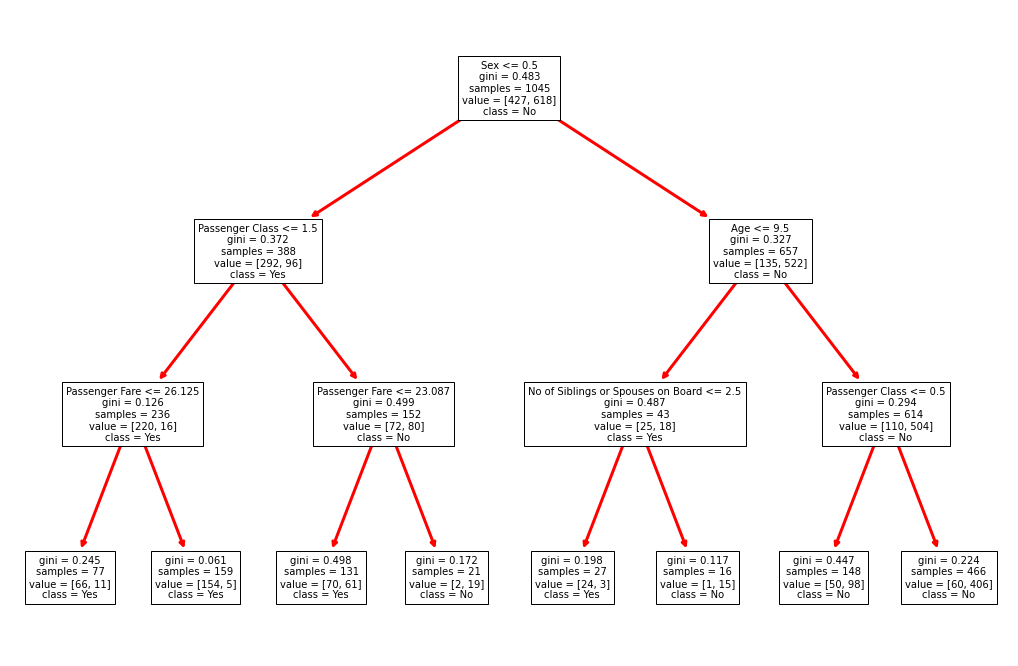

In [40]:
from sklearn import tree
X = df_clean.drop('Survived', axis=1) 
y = df_clean['Survived']
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(18,12))  # set plot size (denoted in inches)
out = tree.plot_tree(clf, fontsize=10, feature_names=X.columns, class_names = label)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
plt.show()

<h3> 1.2 เอารูป กราฟ ชาร์ท ที่ได้ มาเล่าเรื่อง </h3>

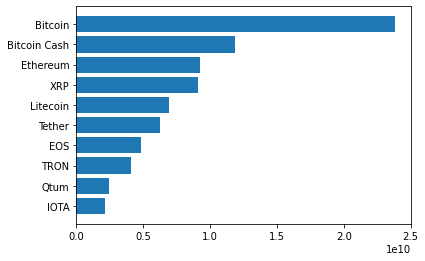

In [41]:
import matplotlib.pyplot as plt
plt.barh(top10.index, top10)
plt.show()

รูปที่ 1: เป็นการแสดงข้อมูลเหรียญในรุปแบบ matplotlib ซึ่งเป็น module พื้นฐานในการสร้างกราฟใน python โดยกราฟนี้จะแสดงข้อมูลเหรียญที่มีมูลค่ามากที่สุดในตลาด 10 อันดับ ซึ่งเราจะเห็นได้ว่า Bitcoin มีมูลค่าเหรียญมากที่สุดในตลาด

<AxesSubplot:ylabel='name'>

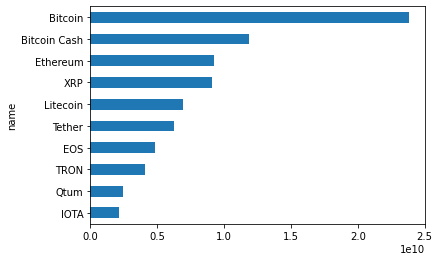

In [42]:
top10.plot(kind='barh')

รูปที่ 2: เป็นการแสดงข้อมูลเหรียญที่มีมูลค่ามากที่สุดในตลาด 10 อันดับ ซึ่งเราจะเห็นได้ว่า Bitcoin มีมูลค่าเหรียญมากที่สุดในตลาด และจะเห็นว่ามีแสดงผลเหมือนกับรูปแรกแต่ต่างกันตรงที่การ plot กราฟ

<AxesSubplot:ylabel='volume_billion'>

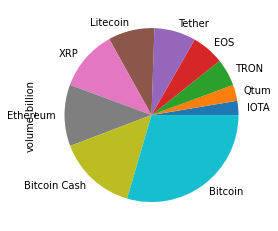

In [43]:
top10.plot(kind='pie')

รูปที่ 3: เป็นการแสดงข้อมูลเหรียญที่มีมูลค่ามากที่สุดในตลาด 10 อันดับ แต่เป็นการแสดงผลในรูปแบบของ pie chart จะเห็นได้ว่าวิธีนี้จะมีการแบ่งส่วนให้ดูง่ายและสวยงาม ซึ่งจาก chart นี้ก็จะเห็นได้ว่า Bitcoin มีสัดส่วนที่มากที่สุด

<AxesSubplot:xlabel='date'>

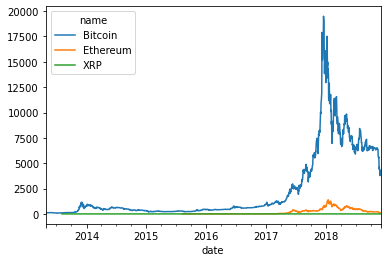

In [44]:
best3.groupby(['date','name'])['close'].mean().unstack().plot()

รูปที่ 4: เป็นการแสดงข้อมูล 3 เหรียญได้แก่ Bitcoin, Ethereum และ XRP ที่มีมูลค่าขึ้นลงในระยะเวลาตั้งแต่ปี 2014-2018 แต่เป็นการแสดงผลในรูปแบบของ line chart เห็นได้ว่าวิธีนี้จะแสดงการเปลี่ยนแปลงของข้อมูลอย่างชัดเจน ซึ่งจาก chart นี้ก็จะเห็นได้ว่ามูลค่าของ Bitcoin ขึ้นสูงมากตั้งแต่ปี 2017 และลดลงในปี 2018

<AxesSubplot:xlabel='date'>

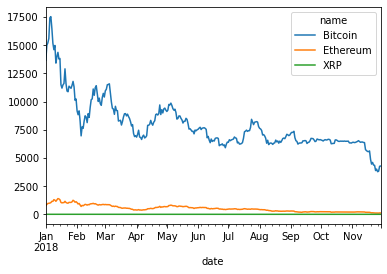

In [45]:
best3[best3['date'].dt.year == 2018].groupby(['date','name'])['close'].mean().unstack().plot()

รูปที่ 5: เป็นการแสดงผลเหรียญ 3 อันดับที่มีมูลค่าสูงที่สุดในตลาด ในรูปแบบของ line chart เหมือนรูปที่ 4 แต่จะมีการแสดงข้อมูลราคาขึ้นลงแค่ในปี 2018 เห็นได้ว่ามูลค่าของ Bitcoin ขึ้นสูงมากตั้งแต่เดือนมกราคมและมีแนวโน้มลดลง

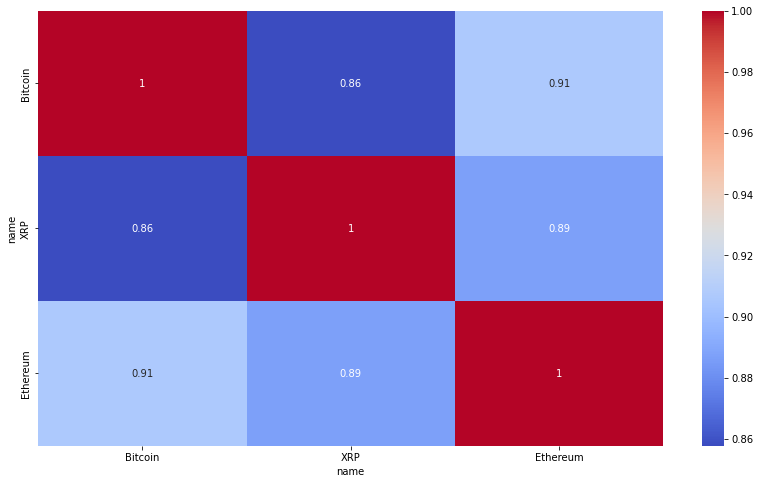

In [46]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.heatmap(close_price[best3['name'].unique()].corr(), cmap='coolwarm', annot=True);

รูปที่ 6: เป็นการแสดงผลเหรียญ 3 อันดับที่มีมูลค่าสูงที่สุดในตลาด ในรูปแบบของ Heatmap หรือการแสดงความสัมพันธ์ของข้อมูล ซึ่งยิ่งค่ามากเท่าไหร่ก็จะยิ่งมีความสัมพันธ์กันมาก ยิ่งมีค่าน้อยก็มีความสัมพันธ์กันน้อย ซึ่งจากรูปจะเห็นได้ว่า Bitcoin กับ XRP มีค่าน้อยที่สุดก็คือ 0.86 จึงมีความสัมพันธ์กันน้อยที่สุด และ Bitcoin กับ Ethereum มีค่ามากที่สุดก็คือ 0.91 จึงมีความสัมพันธ์กันมากที่สุด และค่าสีแดง หรือ 1 ก็หมายถึงค่าที่มุมเดียวกันกับตัวของมันเอง

In [47]:
import pandas as pd
df = pd.read_csv('../input/all-crypto-currencies/crypto-markets.csv', delimiter=',', header=0)
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


In [49]:
import pandas as pd
df = pd.read_csv('../input/all-crypto-currencies/crypto-markets.csv', index_col=['name','date'])
df

slug symbol  ranknow      open      high       low  \
name      date                                                                  
Bitcoin   2013-04-28    bitcoin    BTC        1    135.30    135.98    132.10   
          2013-04-29    bitcoin    BTC        1    134.44    147.49    134.00   
          2013-04-30    bitcoin    BTC        1    144.00    146.93    134.05   
          2013-05-01    bitcoin    BTC        1    139.00    139.89    107.72   
          2013-05-02    bitcoin    BTC        1    116.38    125.60     92.28   
...                         ...    ...      ...       ...       ...       ...   
Project-X 2018-11-26  project-x  NANOX     1727  22424.60  23049.30  17607.50   
          2018-11-27  project-x  NANOX     1727  20711.90  23742.10  19292.90   
          2018-11-28  project-x  NANOX     1727  23320.90  25235.10  19888.10   
          2018-11-29  project-x  NANOX     1727  24543.53  24582.47  21457.95   
          2018-11-30  project-x  NANOX     1727  22872.09  23086.98  19040.91   

                         close  volume        market  close_ratio   spread  
name      date                                                              
Bitcoin   2013-04-28    134.21     0.0  1.488567e+09       0.5438     3.88  
          2013-04-29    144.54     0.0  1.603769e+09       0.7813    13.49  
          2013-04-30    139.00     0.0  1.542813e+09       0.3843    12.88  
          2013-05-01    116.99     0.0  1.298955e+09       0.2882    32.17  
          2013-05-02    105.21     0.0  1.168517e+09       0.3881    33.32  
...                        ...     ...           ...          ...      ...  
Project-X 2018-11-26  20724.80   143.0  1.622000e+03       0.5728  5441.80  
          2018-11-27  23298.70   637.0  1.823000e+03       0.9003  4449.20  
          2018-11-28  24442.70    49.0  1.913000e+03       0.8518  5347.00  
          2018-11-29  22839.44   153.0  1.788000e+03       0.4421  3124.52  
          2018-11-30  21136.72   125.0  1.654000e+03       0.5180  4046.07  

[942297 rows x 11 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 942297 entries, ('Bitcoin', '2013-04-28') to ('Project-X', '2018-11-30')
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   ranknow      942297 non-null  int64  
 3   open         942297 non-null  float64
 4   high         942297 non-null  float64
 5   low          942297 non-null  float64
 6   close        942297 non-null  float64
 7   volume       942297 non-null  float64
 8   market       942297 non-null  float64
 9   close_ratio  942297 non-null  float64
 10  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 82.8+ MB


In [51]:
df.loc['Bitcoin']

,slug,symbol,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,
2013-04-28,bitcoin,BTC,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...
2018-11-25,bitcoin,BTC,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
2018-11-26,bitcoin,BTC,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2018-11-27,bitcoin,BTC,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95


In [52]:
df.sort_values(['date', 'name'], inplace=True)
df

,,slug,symbol,ranknow,open,high,low,close,volume,market,close_ratio,spread
name,date,,,,,,,,,,,
Bitcoin,2013-04-28,bitcoin,BTC,1,135.300000,135.980000,132.100000,134.210000,0.0,1.488567e+09,0.5438,3.88
Litecoin,2013-04-28,litecoin,LTC,7,4.300000,4.400000,4.180000,4.350000,0.0,7.463694e+07,0.7727,0.22
Namecoin,2013-04-28,namecoin,NMC,371,1.100000,1.120000,1.080000,1.110000,0.0,5.995983e+06,0.7500,0.04
Novacoin,2013-04-28,novacoin,NVC,700,4.220000,4.250000,4.040000,4.250000,0.0,1.162268e+06,1.0000,0.21
Peercoin,2013-04-28,peercoin,PPC,159,0.386958,0.404659,0.376287,0.386525,0.0,7.250189e+06,0.3608,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
vSportCoin,2018-11-29,vsportcoin,VSC,1850,0.001395,0.001527,0.001308,0.001450,35022.0,0.000000e+00,0.6484,0.00
wys Token,2018-11-29,wys-token,WYS,2058,0.005643,0.005670,0.005362,0.005465,0.0,0.000000e+00,0.3344,0.00
42-coin,2018-11-30,42-coin,42,1228,23272.240000,25082.690000,21436.750000,22665.930000,308.0,9.519680e+05,0.3371,3645.94


<AxesSubplot:xlabel='date'>

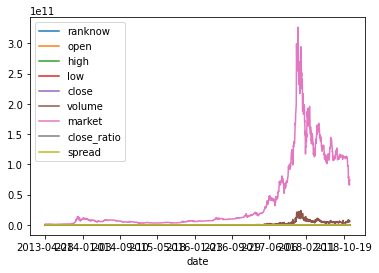

In [53]:
df.loc['Bitcoin'].plot()

<AxesSubplot:xlabel='date'>

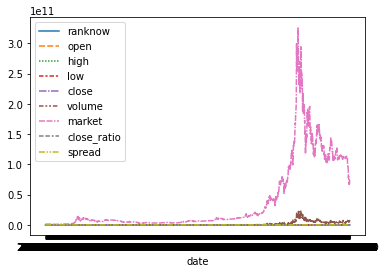

In [54]:
sns.lineplot(data=df.loc['Bitcoin'])

<AxesSubplot:xlabel='date', ylabel='high'>

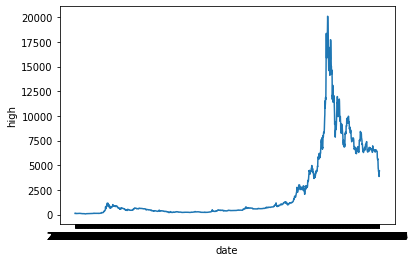

In [55]:
dg = df.loc['Bitcoin']
sns.lineplot(x=dg.index, y=dg['high'])